In [ ]:
!ls

cyber-threat-intelligence_all.csv
Cyber-Threat-Intelligence-Custom-Data_new_processed.csv
cyber-threat-intelligence-splited_test.csv
cyber-threat-intelligence-splited_train.csv
cyber-threat-intelligence-splited_validate.csv
sample_data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cyber_df = pd.read_csv("/content/cyber-threat-intelligence_all.csv", index_col=0)
cyber_df_train = pd.read_csv("/content/cyber-threat-intelligence-splited_train.csv")
cyber_df_test = pd.read_csv("/content/cyber-threat-intelligence-splited_test.csv")
cyber_df_valid = pd.read_csv("/content/cyber-threat-intelligence-splited_validate.csv")
cyber_df_new = pd.read_csv("/content/Cyber-Threat-Intelligence-Custom-Data_new_processed.csv")

In [ ]:
cyber_df_new.head()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
0,249,A cybersquatting domain save-russia[.]today is...,"[{'from_id': 44658, 'id': 9, 'to_id': 44659, '...",The diagnosis is a cyber attack that involves ...,1. Implementing DNS filtering to block access ...,44656,attack-pattern,2,16,44657,url,24,43,44658.0,attack-pattern,57.0,68.0
1,14309,"Like the Android Maikspy, it first sends a not...","[{'from_id': 48531, 'id': 445, 'to_id': 48532,...",The diagnosis is that the entity identified as...,1. Implementing a robust anti-malware software...,48530,SOFTWARE,9,17,48531,malware,17,24,48532.0,Infrastucture,63.0,73.0
2,13996,While analyzing the technical details of this ...,"[{'from_id': 48781, 'id': 461, 'to_id': 48782,...",Diagnosis: APT37/Reaper/Group 123 is responsib...,1. Implementing advanced threat detection tech...,48781,threat-actor,188,194,48782,threat-actor,210,217,48783.0,threat-actor,220.0,229.0
3,13600,(Note that Flash has been declared end-of-life...,"[{'from_id': 51688, 'id': 1133, 'to_id': 51689...",The diagnosis is a malware infection. The enti...,1. Implementing a robust antivirus software th...,51687,TIME,62,79,51688,malware,207,215,51689.0,malware,247.0,258.0
4,14364,Figure 21. Connection of Maikspy variants to 1...,"[{'from_id': 51780, 'id': 1161, 'to_id': 44372...",The diagnosis is that Maikspy malware variants...,1. Implementing a robust firewall system that ...,51779,URL,163,191,51777,URL,70,93,51781.0,malware,120.0,127.0


In [ ]:
cyber_df.shape, cyber_df_train.shape, cyber_df_test.shape, cyber_df_valid.shape, cyber_df_new.shape

((19940, 9), (6812, 10), (1460, 10), (1460, 10), (476, 17))

In [ ]:
cyber_df.head()

,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


In [ ]:
cyber_df_train.columns

Index(['Unnamed: 0', 'index', 'text', 'entities', 'relations', 'Comments',
       'id', 'label', 'start_offset', 'end_offset'],
      dtype='object')

In [ ]:
cyber_df["label"].nunique()

22

In [ ]:
cyber_df["label"].value_counts()

label
malware           1911
location          1405
SOFTWARE          1229
attack-pattern    1206
identity          1165
threat-actor       890
TIME               475
tools              391
FILEPATH           313
vulnerability      245
SHA2               160
campaign           128
URL                127
IPV4                61
SHA1                60
DOMAIN              50
Infrastucture       43
EMAIL               24
REGISTRYKEY         19
MD5                 16
hash                14
url                  6
Name: count, dtype: int64

<Axes: ylabel='label'>

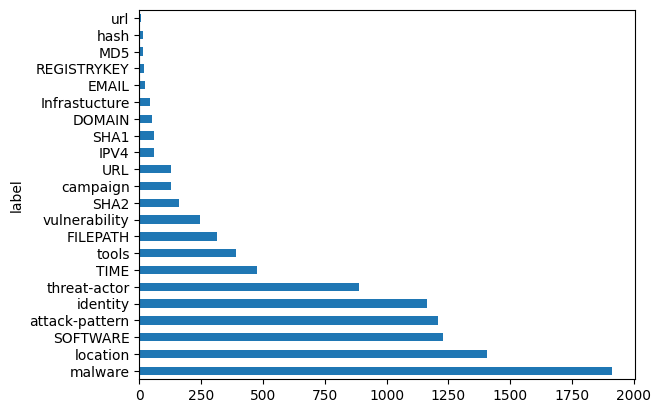

In [ ]:
cyber_df["label"].value_counts().plot(kind = "barh")

In [ ]:
cyber_df[cyber_df["label"] == "location"]

,index,text,entities,relations,Comments,id,label,start_offset,end_offset
43,44.0,"In 2007, the infection of a system in Australi...","[{'id': 45814, 'label': 'location', 'start_off...",[],[],45814.0,location,38.0,48.0
189,191.0,Future attacks may target U.S. and Western Eur...,"[{'id': 45862, 'label': 'location', 'start_off...",[],[],45862.0,location,35.0,51.0
211,213.0,"In tracking this threat, early reports show th...","[{'id': 44633, 'label': 'location', 'start_off...","[{'id': 6, 'from_id': 44638, 'to_id': 44635, '...",[],44633.0,location,114.0,121.0
231,234.0,We monitored a list of 50 legitimate Ukraine-...,"[{'id': 45781, 'label': 'location', 'start_off...","[{'id': 137, 'from_id': 44651, 'to_id': 45781,...",[],45781.0,location,125.0,132.0
633,645.0,While we have not been able to directly confi...,"[{'id': 46229, 'label': 'location', 'start_off...","[{'id': 174, 'from_id': 44818, 'to_id': 44817,...",[],46229.0,location,90.0,99.0
...,...,...,...,...,...,...,...,...,...
4547,NaN,Many Russian government cyber assets have rema...,NaN,NaN,NaN,NaN,location,NaN,NaN
2598,NaN,Apart from Argentinian eCommerce provider Mer...,NaN,NaN,NaN,NaN,location,NaN,NaN
1543,NaN,Sofacy Group has been associated with many at...,NaN,NaN,NaN,NaN,location,NaN,NaN
2598,NaN,Apart from Argentinian eCommerce provider Mer...,NaN,NaN,NaN,NaN,location,NaN,NaN


In [ ]:
cyber_df[cyber_df["label"] == "location"]["text"].values[:3]

array(['In 2007, the infection of a system in Australia went for US$0.60, while an infection in Poland was only a fraction of the cost, at US$0.096.',
       'Future attacks may target U.S. and Western European organizations in retaliation for increased sanctions or other political measures against the Russian government.',
       'In tracking this threat, early reports show that the malware has been deployed against a financial institution in Ukraine as well as two contractors in Latvia and Lithuania that provide services to the Ukrainian Government.'],
      dtype=object)

In [ ]:
cyber_df[cyber_df["label"] == "SOFTWARE"]["text"].values[:3]

array([' We can see here that server hostnames were changed but they didn’t change the server IP address – see the attached file with results for files from last week’s campaign from VirusTotal.',
       'We found 147 new unique pieces of malware today alone, two of them fully undetectable by the legacy security solutions in VirusTotal and most of them barely detected by one vendor (few have 4/57 detection rate).',
       'Here’s the chart for bitcoin over the last two years, showing a rise of 2,000% to 4,000% in the versus the U.S. dollar.'],
      dtype=object)

In [ ]:
cyber_df_new.head()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
0,249,A cybersquatting domain save-russia[.]today is...,"[{'from_id': 44658, 'id': 9, 'to_id': 44659, '...",The diagnosis is a cyber attack that involves ...,1. Implementing DNS filtering to block access ...,44656,attack-pattern,2,16,44657,url,24,43,44658.0,attack-pattern,57.0,68.0
1,14309,"Like the Android Maikspy, it first sends a not...","[{'from_id': 48531, 'id': 445, 'to_id': 48532,...",The diagnosis is that the entity identified as...,1. Implementing a robust anti-malware software...,48530,SOFTWARE,9,17,48531,malware,17,24,48532.0,Infrastucture,63.0,73.0
2,13996,While analyzing the technical details of this ...,"[{'from_id': 48781, 'id': 461, 'to_id': 48782,...",Diagnosis: APT37/Reaper/Group 123 is responsib...,1. Implementing advanced threat detection tech...,48781,threat-actor,188,194,48782,threat-actor,210,217,48783.0,threat-actor,220.0,229.0
3,13600,(Note that Flash has been declared end-of-life...,"[{'from_id': 51688, 'id': 1133, 'to_id': 51689...",The diagnosis is a malware infection. The enti...,1. Implementing a robust antivirus software th...,51687,TIME,62,79,51688,malware,207,215,51689.0,malware,247.0,258.0
4,14364,Figure 21. Connection of Maikspy variants to 1...,"[{'from_id': 51780, 'id': 1161, 'to_id': 44372...",The diagnosis is that Maikspy malware variants...,1. Implementing a robust firewall system that ...,51779,URL,163,191,51777,URL,70,93,51781.0,malware,120.0,127.0


In [ ]:
cyber_df["text"].values[:1]

array(["This post is also available in:      日本語 (Japanese)  CTB-Locker is a well-known ransomware Trojan used by crimeware groups to encrypt files on the victim's endpoints and demand ransom payment to decrypt the files back to their original state, but most antiviruses detect it by mistake as CryptoLocker (only one vendor correctly detects it as CTB-Locker)."],
      dtype=object)

In [ ]:
cyber_df.isna().sum()

index             476
text                0
entities          476
relations         476
Comments          476
id              10478
label           10002
start_offset    10478
end_offset      10478
dtype: int64

In [ ]:
cyber_df[~cyber_df["entities"].isna()]

,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1455,7996.0,"During the pandemic, we also uncovered attacke...",[],[],[],NaN,NaN,NaN,NaN
1456,10044.0,Code snippet of unobfuscated rsync,[],[],[],NaN,NaN,NaN,NaN
1457,4588.0,DEVCORE reported two of the four zero-days (CV...,"[{'id': 50447, 'label': 'identity', 'start_off...",[],[],50447.0,identity,0.0,7.0
1458,13465.0,"On any given day, Google's Threat Analysis Gro...",[],[],[],NaN,NaN,NaN,NaN


In [ ]:
cyber_df[cyber_df["label"].isna()]

,index,text,entities,relations,Comments,id,label,start_offset,end_offset
2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN
6,7.0,The attacker used a polymorphic malware builde...,[],[],[],NaN,NaN,NaN,NaN
7,8.0,This tactic is a nightmare for legacy security...,[],[],[],NaN,NaN,NaN,NaN
10,11.0,Most legacy security programs could not detect...,[],[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1449,6695.0,"Generally, 2020 has been dominated by COVID-19.",[],[],[],NaN,NaN,NaN,NaN
1454,1407.0,Subject: Hearing of your case in Court,[],[],[],NaN,NaN,NaN,NaN
1455,7996.0,"During the pandemic, we also uncovered attacke...",[],[],[],NaN,NaN,NaN,NaN
1456,10044.0,Code snippet of unobfuscated rsync,[],[],[],NaN,NaN,NaN,NaN


In [ ]:
cyber_df[cyber_df["label"].isna()]["text"].values[:1]

array(['Once executed by the user the first stage malware downloads and executes the ransomware from a fixed hardcoded server list.'],
      dtype=object)